In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# A linear relationship between `x` and `y`. (same as before)
m = 5
b = 7
r = range(-50, 50)
ind = [ [i] for i in r] # notice this is a list of lists,
                        # the inner list length is the dimensionality
dep = [m * x + b + np.random.uniform(-10,10) for x in r]

Here we have some data, our independent variable `ind` and our dependent variable `dep` and we'd like to fit a linear model to it, sklearn has us covered (pretend we got the data from a dataset and now that we defined it ourselves):

In [3]:
lm = linear_model.LinearRegression()
lm.fit(ind,dep)

LinearRegression()

Now we can plot the regression compared to our dataset:

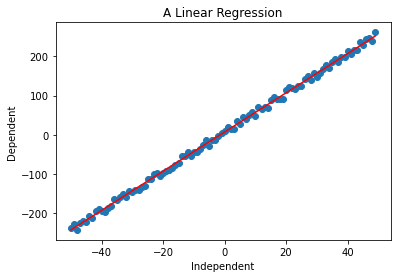

In [4]:
fig, ax = plt.subplots()
    
ax.scatter(ind, dep)
ax.set_xlabel("Independent")
ax.set_ylabel("Dependent")
ax.set_title("A Linear Regression")
    
ax.plot(ind, lm.predict(ind), color='red')

Now consider the following:

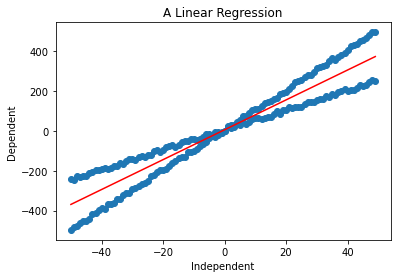

In [5]:
# A linear relationship between `x` and `y`. (same as before)
m = 5
m2 = 10
b = 7
r = range(-50, 50)

      # doesn't likes cats
ind = [ [i] for i in r] + [ [i] for i in r ]
                            # likes cats

dep = [m * x + b + np.random.uniform(-10,10) for x in r] + [m2 * x + b + np.random.uniform(-10,10) for x in r]

lm = linear_model.LinearRegression()
lm.fit(ind,dep)

fig, ax = plt.subplots()
    
ax.scatter(ind, dep)
ax.set_xlabel("Independent")
ax.set_ylabel("Dependent")
ax.set_title("A Linear Regression")
    
ax.plot(ind, lm.predict(ind), color='red')

This is a rather extreme example, meant to illustrate a point. This linear Regression is wrong, even though it has OK predictive power. The issue is that some other factor is _interacting_ with our model. What we need to do is teach the model about this interaction. This is known as an _interaction term_. In this case the interaction has to do with the _evenness_ of the value. While this is a numerical property, I want you to pretend it's a categorical property like, I don't know _country_ or _continent_ perhaps.

The idea is that we can convert any categorical property into a numerical one by creating a new dimension in our dataset that is 0 when the value is not in the category and 1 when it is. Let's look:

In [6]:
# This is the main change!!!
ind = [ [i,0] for i in r] + [ [i,1] for i in r] 

# notice our inner list is longer now!

So, now our independent variables have another dimension to them. Great!

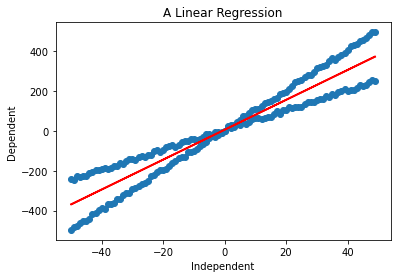

In [7]:
lm2 = linear_model.LinearRegression()
lm2.fit(ind,dep)

fig, ax = plt.subplots()

just_data = [i[0] for i in ind]
ax.scatter(just_data, dep)
ax.set_xlabel("Independent")
ax.set_ylabel("Dependent")
ax.set_title("A Linear Regression")
    
ax.plot(just_data, lm2.predict(ind), color='red')

It may not look very different in this form (though the red line is thicker), but we have reduced the residual error! Take a look!

In [8]:
print(f"Without interaction term at x = 1: {lm.predict([[1]])}\n")
print(f"With interaction term at x = 1: {lm2.predict([[1,0]])} (doesn't like cats), {lm2.predict([[1,1]])} (likes cats)\n")

Without interaction term at x = 1: [14.04592872]

With interaction term at x = 1: [15.25071724] (doesn't like cats), [12.84114019] (likes cats)

